<a href="https://colab.research.google.com/github/amitkumar8486/EDA-Hotel-Booking-Analysis/blob/main/EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing the required packages

In [ ]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick

# Mounting the google drive

In [ ]:
#mouting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing dataset

In [ ]:
#importing dataset
# Defining the path for data file
path = '/content/drive/MyDrive/AlmaBetter/capstone-project/EDA-Hotel-Booking-Analysis/dataset/Hotel Bookings.csv'


# Reading and Displaying the dataset

In [ ]:
# Reading the data file
df = pd.read_csv(path)

In [ ]:
#displaying the dataset-using head()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#displaying the dataset-using tail()
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# Looking the shape and descriptive stats of the dataframe

In [ ]:
# Looking the shape of the dataframe
df.shape

(119390, 32)

In [ ]:
# Looking for the descriptive stats
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


The dataset contains 119390 rows and 32 columns






# Looking at the datatypes and null values

In [ ]:
# Looking at the datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Looking at the null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

we have lots of NaN values in agent and company columns.


In [ ]:
df[['children','country','agent','company']]

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN
...,...,...,...,...
119385,0.0,BEL,394.0,NaN
119386,0.0,FRA,9.0,NaN
119387,0.0,DEU,9.0,NaN
119388,0.0,GBR,89.0,NaN


# Data Preprocessing

In [ ]:
# Making a copy of the dataframe
hotel_df = df.copy()

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


* # Dealing with missing values

In [ ]:
# Filling the null values with '0' as the respective columns only contains the id of the agent and company
hotel_df['company'].fillna(0.0, inplace=True)
hotel_df['agent'].fillna(0.0, inplace=True)

In [ ]:
hotel_df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [ ]:
# Filling the null values with mode
hotel_df['country'].fillna(hotel_df.country.mode().to_string(), inplace=True)

In [ ]:
hotel_df['country'].isnull().sum()

0

In [ ]:
# Filling the null values with mean
hotel_df['children'].fillna(round(hotel_df.children.mean()), inplace=True)

In [ ]:
hotel_df['children'].isnull().sum()

0

In [ ]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Looking for the rows having guest as '0'
hotel_df[(hotel_df['adults']==0) & (hotel_df['children']==0) & (hotel_df['babies']== 0)].shape

(180, 32)

In [ ]:
# Droping the rows having guest as '0'
hotel_df = hotel_df.drop(hotel_df[(hotel_df['adults']==0) & (hotel_df['children']==0) & (hotel_df['babies']== 0)].index)

In [ ]:
hotel_df.shape

(119210, 32)

In [ ]:
# Changing the datatype
hotel_df[['children', 'company', 'agent']] = hotel_df[['children', 'company', 'agent']].astype('int64')

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

# Exploratory Data Analysis

# Overview of the type of Hotels

([<matplotlib.patches.Wedge at 0x7fb254b3a190>,
 [Text(-0.9570941673166501, -0.5421906997435941, 'City Hotel'),
  Text(1.0441027833602214, 0.591480665600693, 'Resort Hotel')],
 [Text(-0.5220513639909, -0.29574038167832406, '66.41%'),
  Text(0.609059956960129, 0.3450303882670709, '33.59%')])

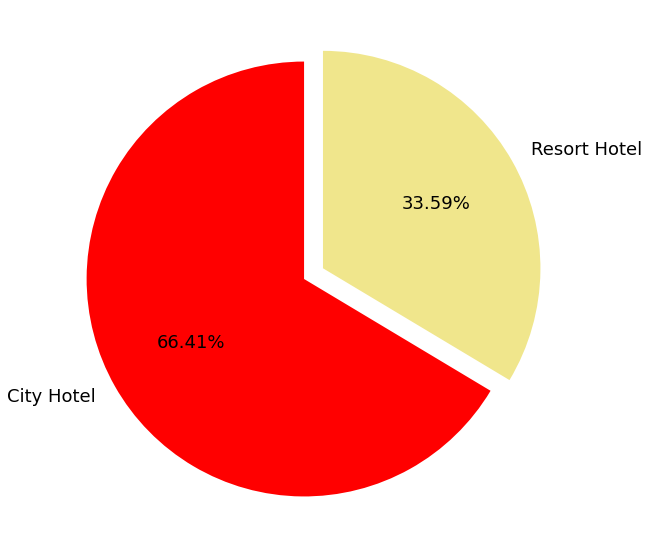

In [ ]:
#configuring the pie chart
plt.rcParams['figure.figsize'] = 10,10

# Indexing labels. tolist() will convert the index to list
labels = hotel_df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel_df['hotel'].value_counts().tolist()

# Explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['r','khaki']

#ploting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',startangle=90, textprops={'fontsize': 18})

 Here we can see that huge proportion of hotels is city hotel. Resort hotel is expensive so most people will book mostly city hotel.

# How Many Booking Were Cancelled?

Let’s write the function to get the percentage of different values.

In [ ]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

This function takes a series or data frame column and returns the two arrays

x is our unique values and
y is the percentage value of each unique value

Now let’s use this function on our is_canceled feature and see the result


In [ ]:
x,y = get_count(df['is_canceled'])
x,y

(array([0, 1]), array([62.95837172, 37.04162828]))

is_canceled have two unique values: 1 if booking got canceled, else 0.

Now let’s plot this result. I will write another function to plot the diagram. The good thing about writing function is that we can reuse the code again and again.


In [ ]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_label:  String value for x-axis label
        y_label:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



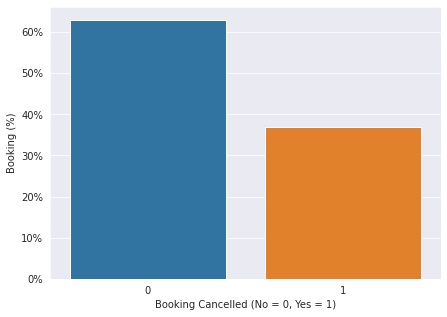

In [ ]:
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

 63% of time the guests checked-in whereas 37% of time the booking got cancelled.

<b>For further analysis, We will select only those bookings which did not get canceled


In [ ]:
df_not_cancel = hotel_df[hotel_df['is_canceled'] == 0]

# Booking ratio between Resort Hotel and City Hotel

For this case,we can again call the functions that we created earlier. All we have to do is to pass the dataframe column to get_count() function and pass its result (x and y array) to plot function.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



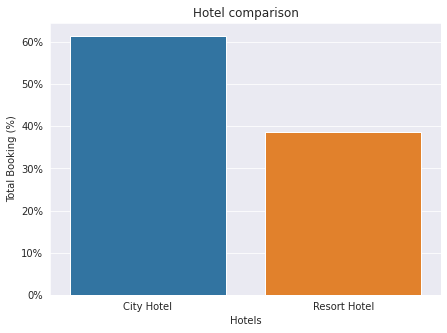

In [ ]:
x,y = get_count(df_not_cancel['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

More than 60% of the population booked the City hotel

# What is the percentage of booking for each year?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



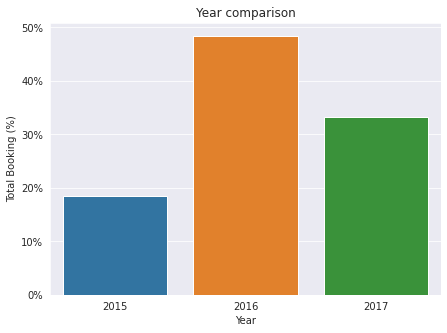

In [ ]:
x,y = get_count(df_not_cancel['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

In 2015 the booking rate was nearly 19% and for the 2016 and 2017, it was about 48% and 33% respectively.

# From which country most guest come?

In [ ]:
data_country = hotel_df[hotel_df['is_canceled']==0]['country'].value_counts().reset_index()
data_country.columns = ['Country','No.of Guests']
data_country

,Country,No.of Guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,DMA,1
162,MMR,1
163,PYF,1
164,SYC,1


In [ ]:
import plotly.express as px
px.choropleth(data_country,locations=data_country['Country'],color=data_country['No.of Guests'],hover_name=data_country['Country'],title='Home Country of Guests')


we can see mostly guests come from PRT country there is no of guests is 11.666k

# Deposit Types

Text(0.5, 1.0, 'Types of deposits')

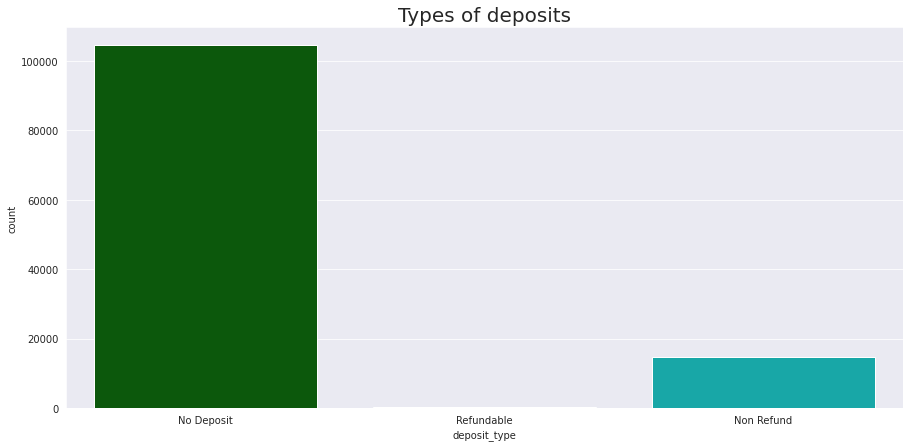

In [ ]:
#deposite types
plt.figure(figsize=(15,7))
sns.countplot(data = hotel_df,palette=['darkgreen','skyblue',"c"], x = 'deposit_type').set_title('Types of deposits', fontsize = 20)

Majority of the booking does not require deposit. 

# Types of Guests

Text(0.5, 1.0, 'Types of Guests')

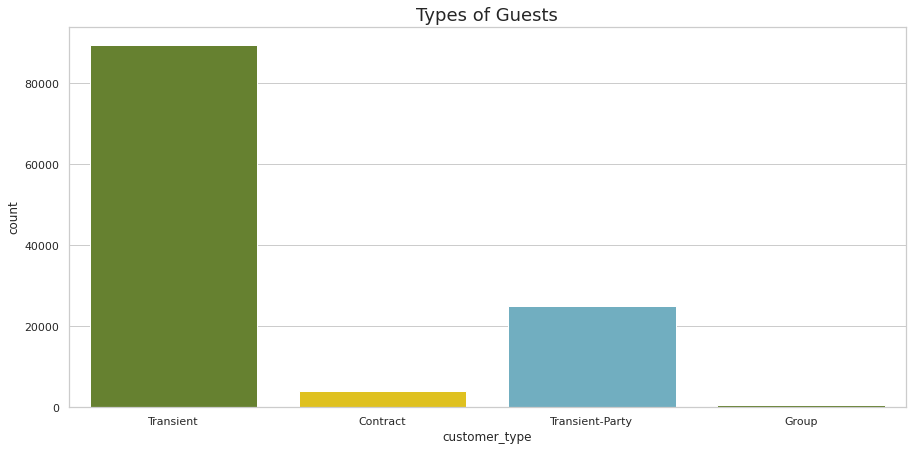

In [ ]:
#type of guests
plt.figure(figsize=(15,7))
sns.countplot(data = hotel_df,palette=['olivedrab','gold','c'], x = 'customer_type').set_title('Types of Guests', fontsize = 18)

Majority of the bookings are transient. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response from their booking.

# Overview of Arrival Period

1. Number of Arrvial per Year




Text(0.5, 1.0, 'Number of arrival per year')

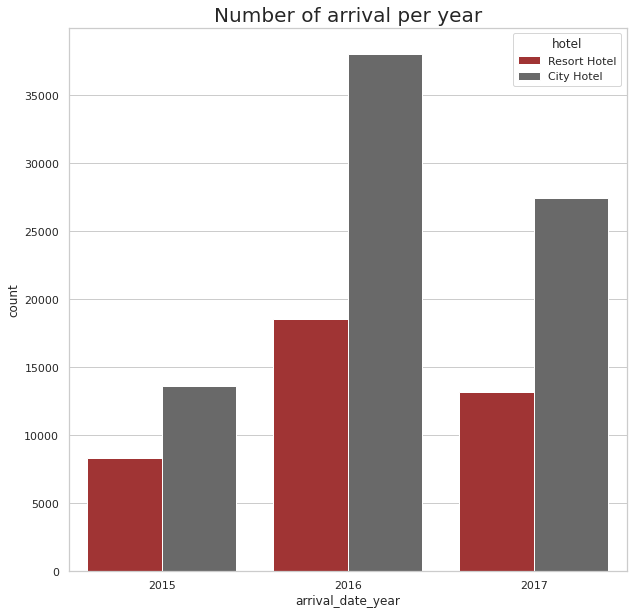

In [ ]:
#1.arrival per year
arr_list = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_of_arrival = hotel_df[arr_list]
sns.set_theme(style="whitegrid")
sns.countplot(data = period_of_arrival,palette=['firebrick',"dimgrey"],x = 'arrival_date_year', hue = 'hotel').set_title('Number of arrival per year',fontsize=20)

Here we can see that 2016 seems to be the year where hotel booking is at its highest.

2. Number of arrival per month




Text(0, 0.5, 'Count')

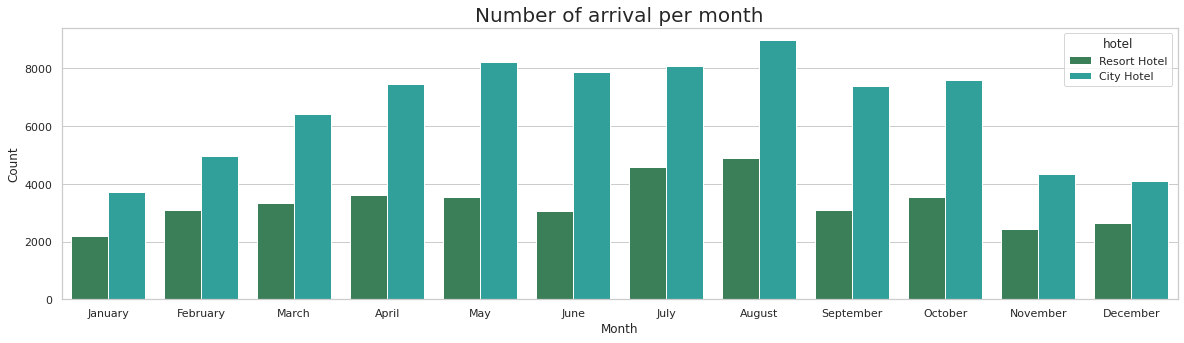

In [ ]:
#2.arrival per month
plt.figure(figsize=(20,5))

sns.countplot(data = period_of_arrival,palette=['seagreen',"lightseagreen"], x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

From the above graph it can be concluded that August has the  highest number of booking. The reason could be Summer ends around August, followed straight by autumn.

# How Long People Stay in the hotel?

In [ ]:
# Creating a feature 'total_nights' which gives the total weekend + weekdays nights spend by guests

hotel_df['total_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']


In [ ]:
# It shows what prcentage of guests stayed for how many nights
 
percentage_total_nights_stayed = hotel_df[hotel_df['is_canceled']==0]['total_nights'].value_counts()/len(hotel_df['is_canceled'])*100
percentage_total_nights_stayed

1     13.198557
3     13.184297
2     12.977938
4      9.239997
7      4.763862
5      4.285714
6      1.942790
10     0.653469
8      0.598943
14     0.550289
0      0.521768
9      0.442077
11     0.229008
12     0.102340
13     0.075497
15     0.031038
21     0.030199
28     0.018455
16     0.015099
17     0.012583
25     0.011744
22     0.007550
18     0.005033
19     0.005033
35     0.004194
42     0.002517
23     0.001678
29     0.001678
30     0.001678
56     0.000839
20     0.000839
24     0.000839
34     0.000839
69     0.000839
38     0.000839
45     0.000839
46     0.000839
48     0.000839
60     0.000839
Name: total_nights, dtype: float64

In [ ]:
hotel_df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0


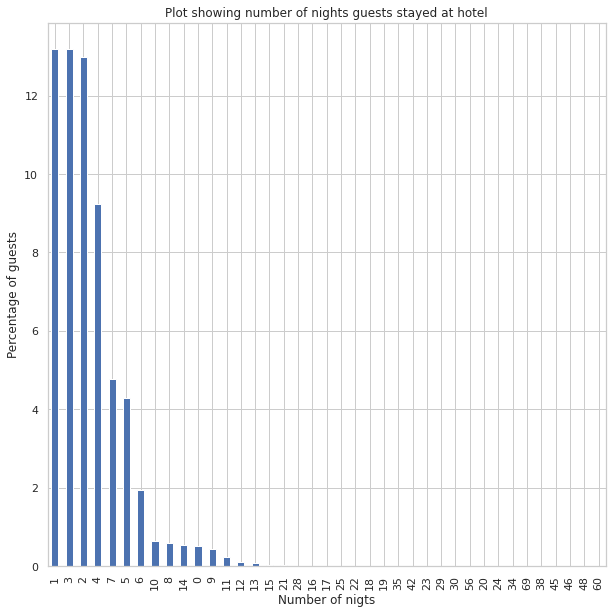

In [ ]:
# Creating the Bar plot for  showing number of nights guests stayed at hotel

percentage_total_nights_stayed.plot(kind='bar')

plt.title('Plot showing number of nights guests stayed at hotel')
plt.ylabel('Percentage of guests')
plt.xlabel('Number of nigts')

plt.rcParams['figure.figsize'] = (10, 5)

Most of the guests stayed at the hotel for 2 nights.

Text(0.5, 1.0, 'Number of stays on weekend nights')

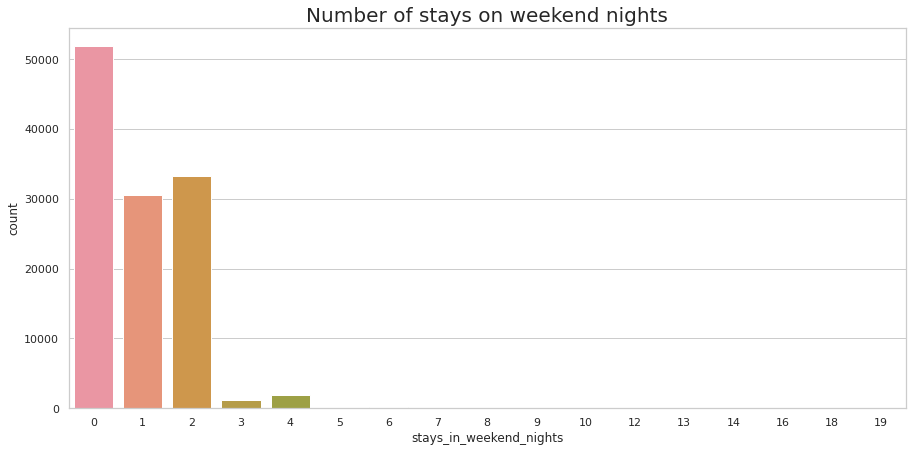

In [ ]:
#number of stays on weekend nights
plt.figure(figsize=(15,7))
sns.countplot(data = hotel_df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

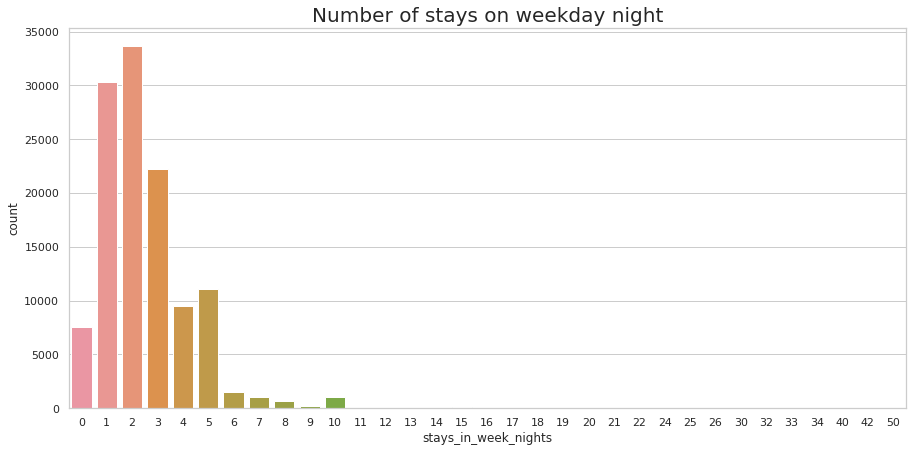

In [ ]:
#number of stays on weekday night
plt.figure(figsize=(15,7))
sns.countplot(data = hotel_df, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 20)


It seems that majority of the stays are over the weekday's night. Hence, it seems that whatever we saw for the chart on day of the month was random.

# Preference of the guests to make bookings

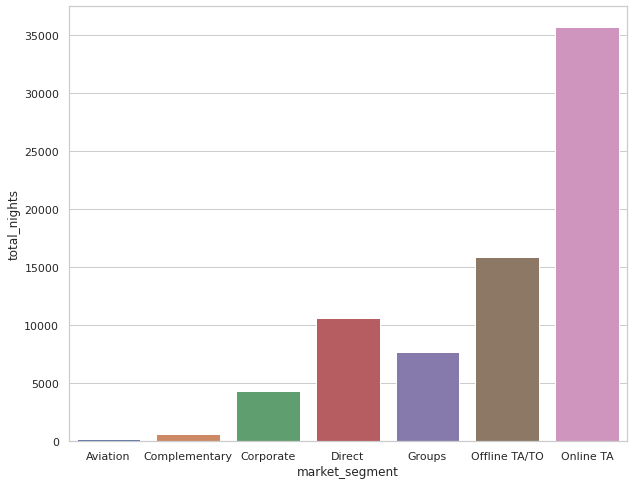

In [ ]:
# Showing the preference of the guests to make bookings
plt.figure(figsize=(10,8))
sns.barplot(x=hotel_df[hotel_df['is_canceled']==0].groupby('market_segment')['total_nights'].count().index,
            y=hotel_df[hotel_df['is_canceled']==0].groupby('market_segment')['total_nights'].count())

The online travel agents are preferred by the guests for reservation.

# Which was the most booked accommodation type?

In [ ]:
##select only those bookings which did not get canceled
booking_not_canceled = hotel_df[hotel_df['is_canceled'] == 0]

[21.359533935022863, 65.50505925797549, 12.672807988161736]


Text(0, 0.5, 'Bookings (%)')

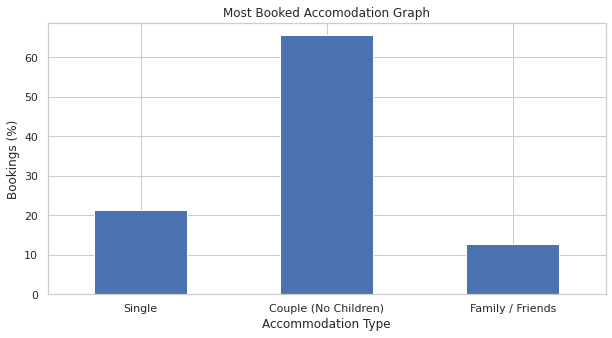

In [ ]:

## Select single, couple, multiple adults and family
single   = booking_not_canceled[(booking_not_canceled.adults==1) & (booking_not_canceled.children==0) & (booking_not_canceled.babies==0)]
couple   = booking_not_canceled[(booking_not_canceled.adults==2) & (booking_not_canceled.children==0) & (booking_not_canceled.babies==0)]
family   = booking_not_canceled[booking_not_canceled.adults + booking_not_canceled.children + booking_not_canceled.babies > 2]


## Make the list of type names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/booking_not_canceled.shape[0]*100 for x in count]
print(count_percent)

## Graph representation
plotdata = pd.DataFrame(
    {"bookings": count_percent}, 
    index=names)
plotdata['bookings'].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Most Booked Accomodation Graph")
plt.xlabel("Accommodation Type")
plt.ylabel("Bookings (%)")


Majority of bookings is for couple type accomodation rising up to 65%, followed by 21% for single type accomodation and family/friends type up to 12%.



# Overview of repeated guests

Text(0.5, 1.0, 'Graph showing repeated guest')

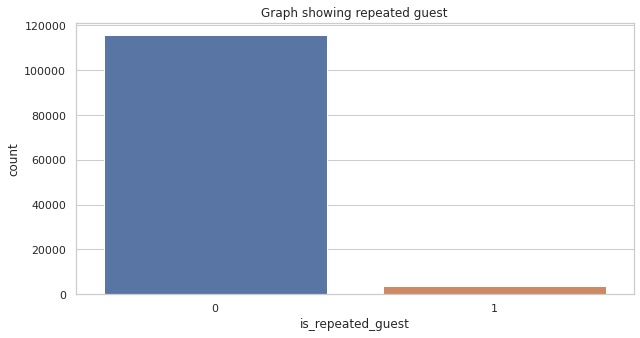

In [ ]:
sns.countplot(data = hotel_df, x = 'is_repeated_guest').set_title('Graph showing repeated guest')

Number of repeated guests is low.

# Looking into prices per month per hotel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



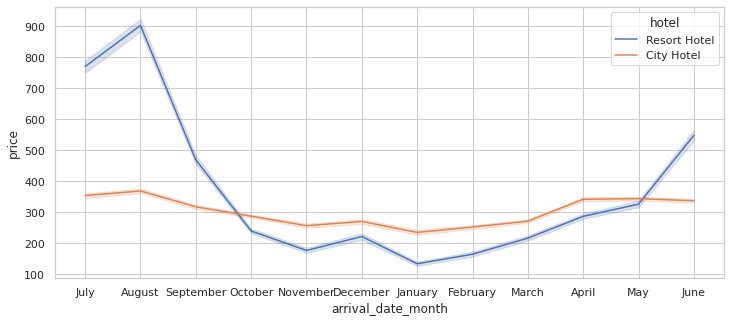

In [ ]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
hotel_df['adr_pp'] = hotel_df['adr'] / (hotel_df['adults'] + hotel_df['children']) 
actual_guests = hotel_df.loc[hotel_df["is_canceled"] == 0]
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])

sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')



*   prices of resort hotels are much higher during monsoon.
*   prices of city hotels are almost same throughout the year.



# what percentage of guests getting the rooms as per their preferences

In [ ]:
# Making a new feature as 'Room' which has the info about wheather the guest has provided with same room as booked or not.
hotel_df['Room'] = 0
hotel_df.loc[ hotel_df['reserved_room_type'] == hotel_df['assigned_room_type'] , 'Room'] = 1

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,adr_pp,Room
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,49.0,1


In [ ]:
# Calculating the percentage of guests getting the rooms as per their preferences ('Different room = 0, Same room = 1')

same_room_allotment = hotel_df['Room'].value_counts()/len(hotel_df.Room)*100
same_room_allotment

1    87.58829
0    12.41171
Name: Room, dtype: float64

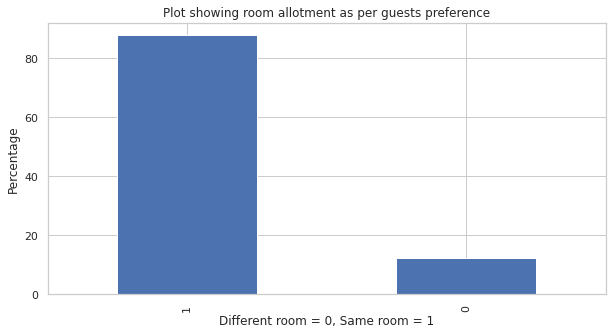

In [ ]:
# Creating the Bar plot for Room allotment 

same_room_allotment.plot(kind='bar')

plt.title('Plot showing room allotment as per guests preference')
plt.ylabel('Percentage')
plt.xlabel('Different room = 0, Same room = 1')

plt.rcParams['figure.figsize'] = (10, 5)

It shows that 87% of the guests got their preferred room.

# Meals preferred by the guests

In [ ]:
# Looking for the different types of meal 
hotel_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

([<matplotlib.patches.Wedge at 0x7fb25327b850>,
 [Text(-0.7829805082673009, -0.9093632517720733, 'BB'),
  Text(1.035308156801985, 0.6067429607826338, 'HB'),
  Text(0.44697235165037347, 1.113649728083357, 'SC'),
  Text(0.09464342987967503, 1.2965502771511066, 'Undefined'),
  Text(0.03154253062649598, 1.4996683195832594, 'FB')],
 [Text(-0.45673862982259217, -0.5304618968670427, '77.37%'),
  Text(0.6039297581344911, 0.3539333937898697, '12.13%'),
  Text(0.2607338717960512, 0.6496290080486249, '8.85%'),
  Text(0.05824211069518462, 0.7978770936314502, '0.98%'),
  Text(0.02102835375099732, 0.9997788797221728, '0.67%')])

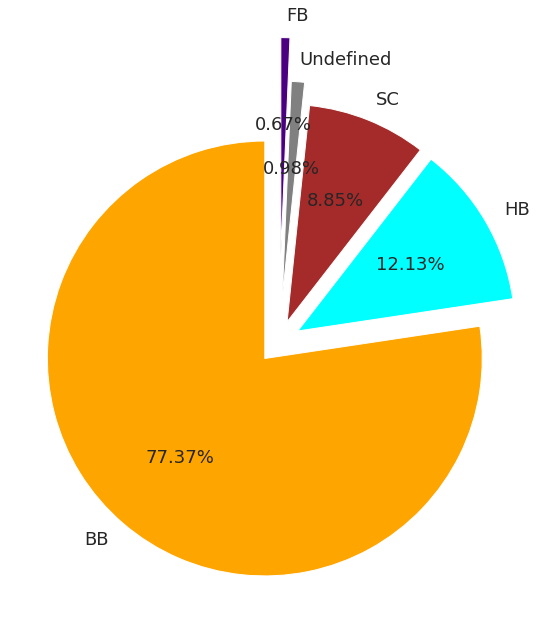

In [ ]:
# Looking for the meals preferred by the guests

#configuring the pie chart
plt.rcParams['figure.figsize'] = 10,10

# Indexing labels. tolist() will convert the index to list
labels = hotel_df['meal'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel_df['meal'].value_counts().tolist()

# Explode will determine how much each section is separated from each other 
explode = (0.1, 0.1, 0.1,0.2,0.4)

# Determine colour of pie chart
colors = ( "orange", "cyan", "brown",
          "grey", "indigo")

#ploting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',startangle=90, textprops={'fontsize': 18})

The pie chart shows that the guests prefered to booked meal BB Bed & Breakfast.


# Analysing the correlation between the given features

In [ ]:
hotel_df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,adr_pp,Room
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,1


In [ ]:
hotel_df.drop(['distribution_channel','agent', 'company', 'reservation_status_date','reservation_status'], inplace=True, axis=1)

In [ ]:
hotel_df.shape

(119210, 30)

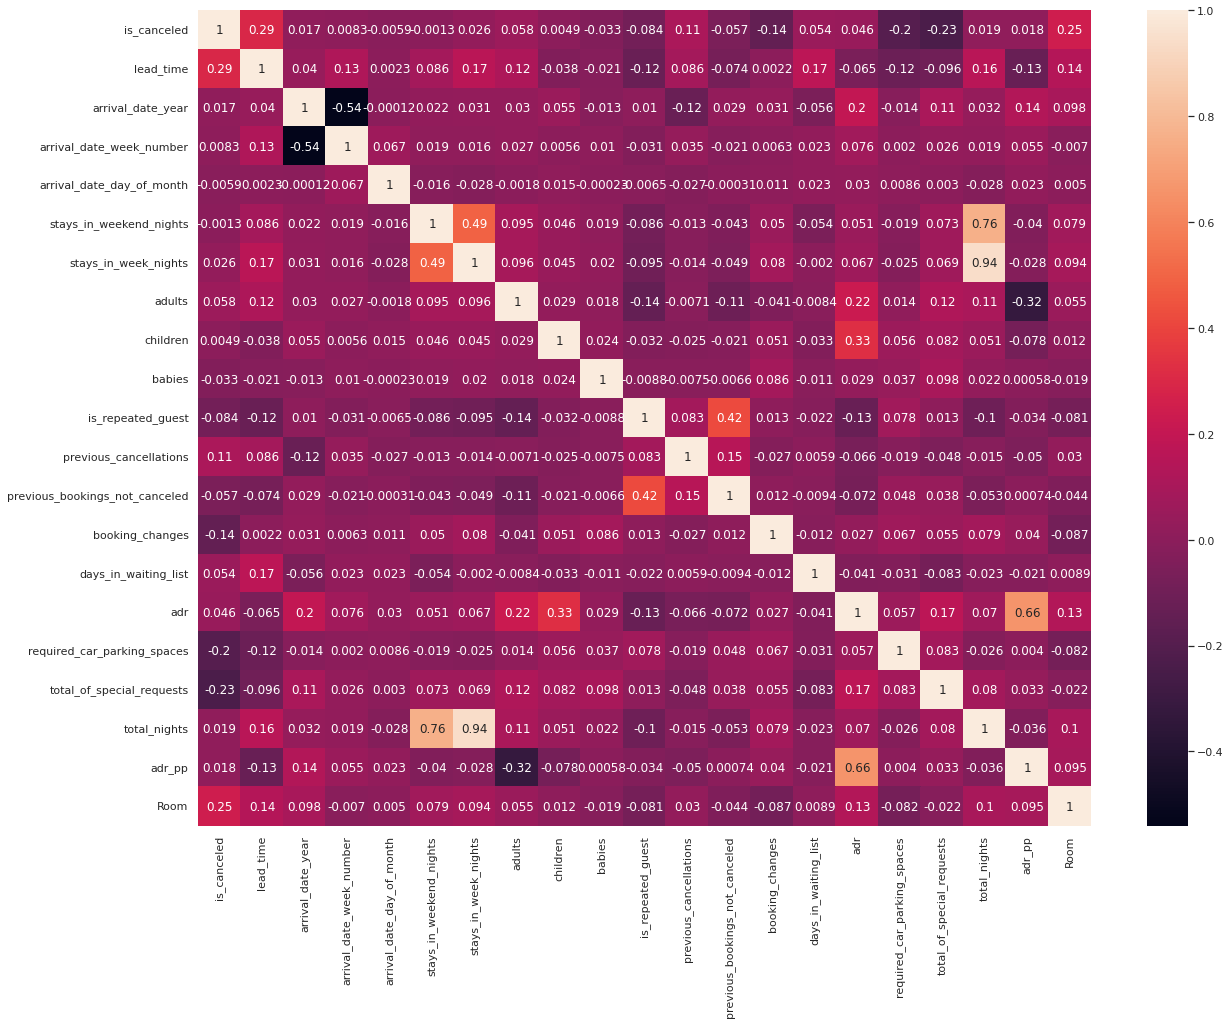

In [ ]:
# Ploting the heatmap using seaborn to check correlation with columns

plt.figure(figsize=(20,15))
sns.heatmap(hotel_df.corr(),annot=True)

A mild correlation is found between repetition of the guest and not canceling the booking which means the guest who are coming to the hotel again are not canceling their bookings frequently.
 



# Conclusion

* Huge proportion of hotels is city hotel.       

* Resort hotel is expensive so most people will book mostly city hotel.
* 63% of time the guests checked-in whereas 37% of time the booking got cancelled.

* More than 60% of the population booked the City hotel.

* In 2015 the booking rate was nearly 19% and for the 2016 and 2017, it was about 48% and 33% respectively.

* We can see mostly guests come from PRT country there is no. of guests is 11.666k.

* Majority of the booking does not require deposit.

* Majority of the bookings are transient. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response from their booking.

* 2016 seems to be the year where hotel booking is at its highest.

* August has the highest number of booking. The reason could be Summer ends around August, followed straight by autumn.

* Most of the guests stayed at the hotel for 2 nights. It seems that majority of the stays are over the weekdays night. 

* The online travel agents are preferred by the guests for reservation.

* Majority of bookings is for couple type accomodation rising up to 65%, followed by 21% for single type accomodation and family/friends type up to 12%.

* Number of repeated guests is low.

* Prices of resort hotels are much higher during monsoon. Prices of city hotels are almost same throughout the year.

* It shows that 87% of the guests got their preferred room.

* The guests prefered to booked meal BB Bed & Breakfast.

* A mild correlation is found between repetition of the guest and not canceling the booking which means the guest who are coming to the hotel again are not canceling their bookings frequently.



